In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [18]:
#Defining function for heat capacity of a metal at low temperature
def heat(T, gamma, beta):
    return gamma*T + beta*T**3
def C_over_T(T, gamma, beta):
    return gamma + beta*T**2

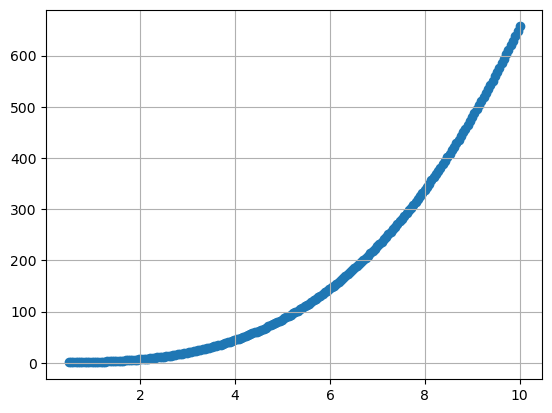

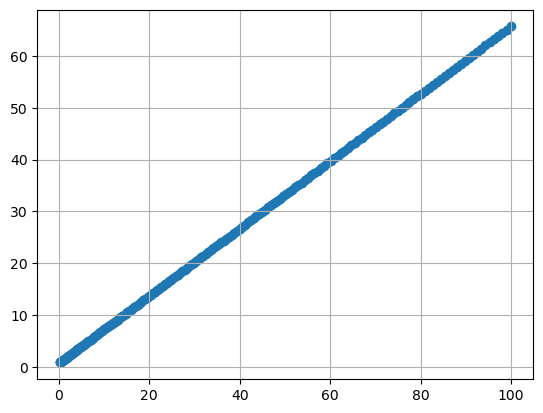

In [3]:
#Plotting data for copper; 
#Just a trial to try and determine what I should factor in for noise
T = np.linspace(0.5, 10, 200) 
Cv = heat(T, 0.70, 0.65) 

plt.scatter(T, Cv)
plt.grid(True)
plt.show()

#Linearize the results
T_square = T**2
C_over_T = Cv/T


plt.scatter(T_square, C_over_T)
plt.grid(True)
plt.show()

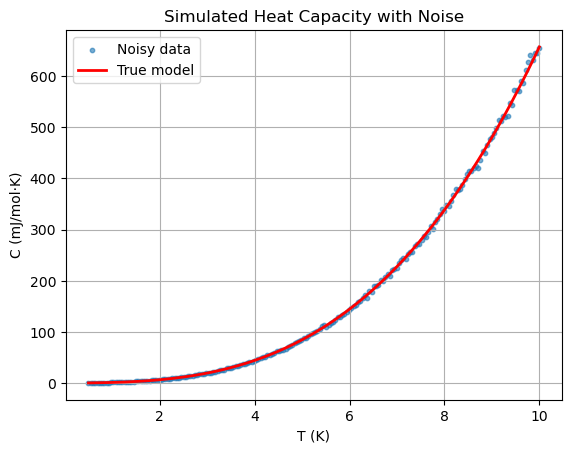

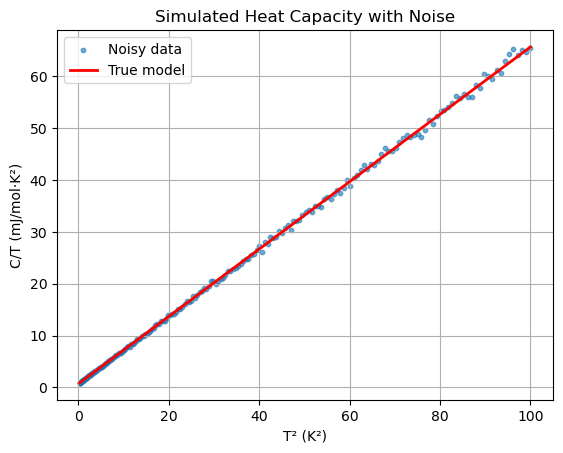

In [4]:
#Simulation of Copper
T = np.linspace(0.5, 10, 200) 
C = heat(T, 0.70, 0.65) 
Cv= C + np.random.normal(0, 0.015*C)
C_T= C/T

#Linearize the results
T_square = T**2
C_over_T = Cv/T


plt.scatter(T, Cv, s=10, alpha=0.6, label="Noisy data")
plt.plot(T, C, color='red', label="True model", linewidth=2)
plt.xlabel("T (K)")
plt.ylabel("C (mJ/mol·K)")
plt.title("Simulated Heat Capacity with Noise")
plt.legend()
plt.grid(True)
plt.show()

plt.scatter(T_square, C_over_T, s=10, alpha=0.6, label="Noisy data")
plt.plot(T_square, C_T, color='red', label="True model", linewidth=2)
plt.xlabel("T\u00b2 (K\u00b2)")
plt.ylabel("C/T (mJ/mol·K\u00b2)")
plt.title("Simulated Heat Capacity with Noise")
plt.legend()
plt.grid(True)
plt.show()

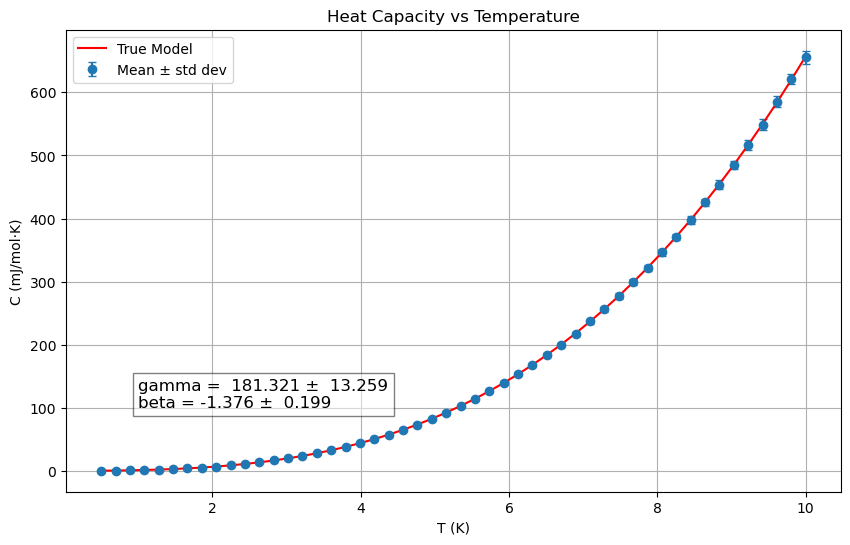

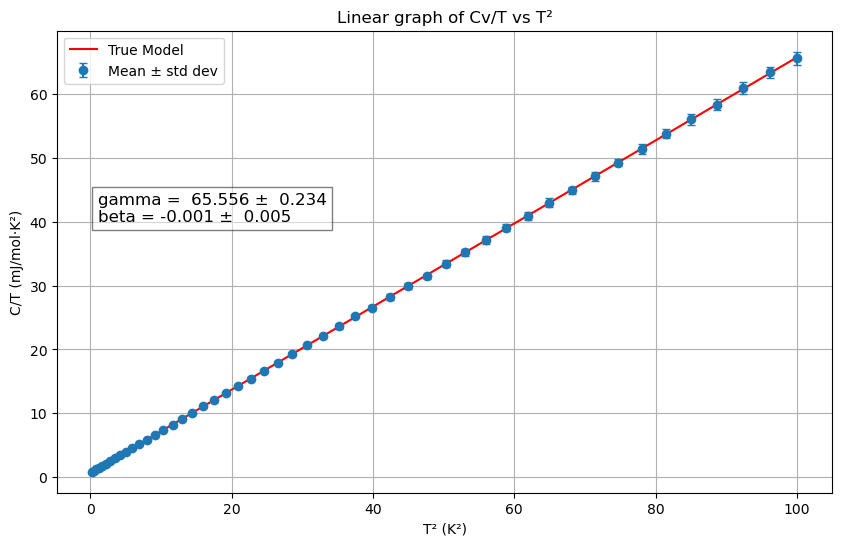

In [25]:
#Repeated trials like an experiment
gamma = 0.70
beta = 0.65
n= 50
T = np.linspace(0.5, 10, n) 


Cv_mean = []
Cv_std = []

CvT_mean = []
CvT_std = []

# Simulate measurements
for i in T:
    C = heat(i, gamma, beta)
    Cv = C + np.random.normal(0, 0.015 * C, n)    
    CvT = Cv/i

    Cv_mean.append(Cv.mean())
    Cv_std.append(Cv.std())
    CvT_mean.append(CvT.mean())
    CvT_std.append(CvT.std())
    
# Set up arrays
T = np.array(T)
T_square = np.array(T)**2
Cv_mean = np.array(Cv_mean)
Cv_std = np.array(Cv_std)
CvT_mean = np.array(CvT_mean)
CvT_std = np.array(CvT_std)

#Curve Fits
popt1, pcov1 = curve_fit(heat, T, Cv, p0 = [.5, .5])
popt2, pcov2 = curve_fit(C_over_T, T, CvT, p0 = [.5, .5])

gamma1_fit, beta1_fit = popt1
gamma1_err, beta1_err = np.sqrt(np.diag(pcov1))

gamma2_fit, beta2_fit = popt2
gamma2_err, beta2_err = np.sqrt(np.diag(pcov2))

plt.figure(figsize=(10, 6))
plt.errorbar(T, Cv_mean, yerr=Cv_std, fmt='o', capsize=3, label="Mean ± std dev")
plt.plot(T, heat(T, gamma, beta), label="True Model", color='red')
plt.xlabel("T (K)")
plt.ylabel("C (mJ/mol·K)")
plt.title("Heat Capacity vs Temperature")
fit_text = f'gamma = {gamma1_fit: .3f} ± {gamma1_err: .3f}\nbeta = {beta1_fit: .3f} ± {beta1_err: .3f}'
plt.text(1, 100, fit_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.5, edgecolor = 'black'))
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.errorbar(T_square, CvT_mean, yerr=CvT_std, fmt='o', capsize=3, label="Mean ± std dev")
plt.plot(T**2, heat(T, gamma, beta)/T, label="True Model", color='red')
plt.xlabel("T\u00b2 (K\u00b2)")
plt.ylabel("C/T (mJ/mol·K\u00b2)")
plt.title("Linear graph of Cv/T vs T\u00b2")
fit_text = f'gamma = {gamma2_fit: .3f} ± {gamma2_err: .3f}\nbeta = {beta2_fit: .3f} ± {beta2_err: .3f}'
plt.text(1, 40, fit_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.5, edgecolor = 'black'))
plt.grid(True)
plt.legend()
plt.show()